## Задание #2 
## Соискатель: Колесников Егор

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


URL = "rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net"
PORT = "6432"
USER = "analytics"
PW = "HRanalytics"
DB = "hr-analytics"

In [2]:
DB_URL = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=USER, 
                                                                                  password=PW, 
                                                                                  ipaddress=URL, 
                                                                                  port=PORT, 
                                                                                  dbname=DB))

cnx = create_engine(DB_URL)

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [70]:
# 1
query = 'SELECT created_at, item_total FROM orders'
df1 = pd.read_sql_query(query, cnx)

In [71]:
df1.head()

,created_at,item_total
0,2018-01-05 00:07:04,2543
1,2018-01-05 02:04:42,6076
2,2018-01-05 02:07:35,2617
3,2018-01-05 02:15:15,3422
4,2018-01-05 02:48:52,3666


In [29]:
df_day = pd.DataFrame({'time': df1.loc[:, 'created_at'].apply(lambda x: x.time().hour),
                       'weekday': df1.loc[:, 'created_at'].apply(lambda x: x.weekday()),
                       'item_total': df1['item_total']})
df_day.head()

,time,weekday,item_total
0,0,4,2543
1,2,4,6076
2,2,4,2617
3,2,4,3422
4,2,4,3666


In [33]:
days = ['Monday','Tuesday','Wensday','Thursday',
        'Firday','Saturday','Sunday']

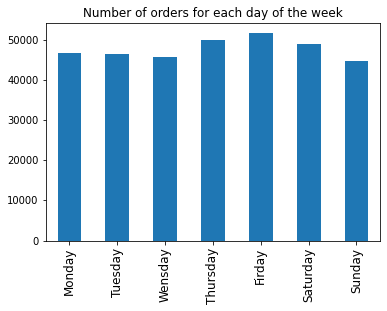

In [51]:
ax = df_day.groupby('weekday')['time'].count().plot(kind='bar') 
ax.set_title('Number of orders for each day of the week')
ax.set_xticklabels(days, rotation='vertical', fontsize=12)
ax.set_xlabel('');

Можно заметить, что объем заказов по четвергам и пятницам больше.

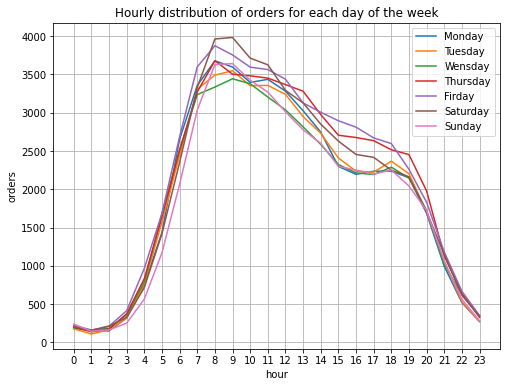

In [79]:
ax = pd.pivot_table(data=df_day, columns='weekday', index='time', aggfunc = len)\
    .plot(figsize = (8,6), xticks = list(range(24)), grid=True)
ax.set_title('Hourly distribution of orders for each day of the week')
ax.set(xlabel='hour', ylabel='orders')
ax.legend(labels=days);

На данном графике мы видим распределение заказов по дняи недели. Как можно заметить, наибольшая активность приходится на 7-11 часов. А также объем заказов по пятницам и четвергам в 15-19 часов больше, чем в остальные дни.


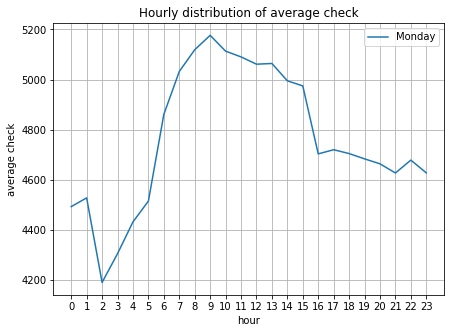

In [80]:
ax = df_day.groupby('time')['item_total'].mean()\
    .plot(figsize = (7,5), xticks = list(range(24)), grid=True)
ax.set_title('Hourly distribution of average check')
ax.set(xlabel='hour', ylabel='average check')
ax.legend(labels=days);

Так же можно заметить, что средний чек коррелирует с объёмом заказов.

In [45]:
# 2
query = 'SELECT o.created_at, o.shipped_at, s.id, s.city, s.retailer_id \
         FROM orders o JOIN delivery_windows d ON o.delivery_window_id = d.id \
         JOIN stores s ON  d.store_id = s.id WHERE o.state=\'shipped\''
df2 = pd.read_sql_query(query, cnx)
df2['time'] = (df2['shipped_at'] - df2['created_at'])

In [46]:
df2.head()

,created_at,shipped_at,id,city,retailer_id,time
0,2018-01-05 04:29:15,2018-01-05 10:13:53,14,1,1,0 days 05:44:38
1,2018-01-05 04:29:15,2018-01-05 10:13:53,14,1,1,0 days 05:44:38
2,2018-01-05 04:32:36,2018-01-05 10:57:29,14,1,1,0 days 06:24:53
3,2018-01-05 04:32:36,2018-01-05 10:57:29,14,1,1,0 days 06:24:53
4,2018-01-05 05:39:10,2018-01-09 11:24:41,2,1,1,4 days 05:45:31


In [47]:
print('10 the most popular stores:\n', df2['id'].value_counts()[:10].sort_values(ascending=False))

10 the most popular stores:
 14    164431
2     145639
12    144932
21    128362
8     115063
1      99855
10     94438
11     72667
3      70027
9      38234
Name: id, dtype: int64


По остальным данным сложно делать какие-либо выводы. Здесь представленны 10 самых популярных магазинов (их id)